In [1]:
import numpy as np


N = 10600000
cases = np.genfromtxt("cases.csv", delimiter=",")[:-1]
cases = np.hstack((0,cases))
cases = (cases[1:] - cases[:-1])

def sir9_rhs(t, y, params):
    (
        beta,
        c,
        theta,
        alpha,
        epsilon,
        gamma1,
        mu,
        kappa,
        gamma2,
        gamma3,
        rho,
        gamma4,
        muH,
        beta_v,
        alpha_v,
        gamma_v,
        mu_v,
        rho_v,
        muH_v,
        epsilon_v,
    ) = params
    lamb = beta * (y[2] + y[10] + c * (y[3] + y[11])) / (y[0] + y[1] + y[2] + y[3] + y[6] + y[7] + y[9] + y[10] + y[11] + y[14])
    
    dydt = np.zeros(16)
    dydt[0] = -(lamb + theta) * y[0] #ds/dt
    dydt[1] = lamb * y[0] - alpha * y[1] #
    dydt[2] = alpha * epsilon * y[1] - gamma1 * y[2]
    dydt[3] = alpha * (1 - epsilon) * y[1] - (mu + kappa + gamma2) * y[3]
    dydt[4] = kappa * y[3] - (gamma3 + rho + mu) * y[4]
    dydt[5] = rho * y[4] - (muH + gamma4) * y[5]
    dydt[6] = theta * y[0] - beta_v * lamb * y[6] #dv/dt
    dydt[7] = gamma1 * y[2] + gamma2 * y[3] + gamma3 * y[4] + gamma4 * y[5]
    dydt[8] = mu * (y[3] + y[4]) + muH * y[5]
    
#     dydt[9] = beta_v * lamb * y[6] - alpha_v * y[9]
#     dydt[10] = alpha_v * epsilon * y[9] - gamma_v*gamma1 * y[10]
#     dydt[11] = alpha_v * (1 - epsilon) * y[9] - (mu_v + kappa + gamma_v*gamma2) * y[11]
#     dydt[12] = kappa * y[11] - (gamma_v*gamma3 + rho_v + mu_v) * y[12]
#     dydt[13] = rho_v * y[12] - (muH_v + gamma_v*gamma4) * y[13]
#     dydt[14] = gamma_v*gamma1 * y[10] + gamma_v*gamma2 * y[11] + gamma_v*gamma3 * y[12] + gamma_v*gamma4 * y[13]
#     dydt[15] = mu_v * (y[11] + y[12]) + muH_v * y[13]
    
    #vaccinated equations
    dydt[9] = beta_v * lamb * y[6] - alpha_v * alpha * y[9] 
    dydt[10] = alpha_v * alpha * epsilon_v * epsilon * y[9] - gamma_v*gamma1 * y[10]
    dydt[11] = alpha_v * alpha * (1 - epsilon_v * epsilon) * y[9] - (mu_v * mu + kappa + gamma_v*gamma2) * y[11]
    dydt[12] = kappa * y[11] - (gamma_v*gamma3 + rho_v * rho + mu_v * mu) * y[12]
    dydt[13] = rho_v * rho * y[12] - (muH_v * muH + gamma_v*gamma4) * y[13]
    dydt[14] = gamma_v*gamma1 * y[10] + gamma_v*gamma2 * y[11] + gamma_v*gamma3 * y[12] + gamma_v*gamma4 * y[13]
    dydt[15] = mu_v * mu * (y[11] + y[12]) + muH_v * muH * y[13]
    
    return dydt


# init_params = np.array([
#     0.5, .9, 0.4, 0.167, 0.3, 0.1, 1e-5, 0.25, 0.10, 0.10, 0.22, 0.09,
#     0.06, 0.5, 0.167, 1, 1e-5, 0.22, 0.06
# ])

init_params = np.array([
    0.5, .9, 0.4, 0.167, 0.3, 0.1, 1e-5, 0.25, 0.10, 0.10, 0.22, 0.09,
    0.06, 1, 1, 1, 1, 1, 1, 1
])


sir9 = lambda t, y: sir9_rhs(t, y, init_params)

#initial conditions
E0 = 1000 # unsure (guesses)
A0 = 0#7000 # unsure
I0 = 0#13000
Q0 = 0#20000
H0 = 0#int(0.0001*N)
V0 = int(.42*N)
R0 = 0#2395600
D0 = 0
S0 = N - (E0 + A0 + I0 + Q0 + H0 + V0 + R0 + D0)
VE0 = 500
VA0 = 0
VI0 = 0
VQ0 = 0
VH0 = 0
VR0 = 0
VD0 = 0
V0 -= (VE0 + VA0 + VI0 + VQ0 + VH0 + VR0 + VD0)
y0 = np.array([S0, E0, A0, I0, Q0, H0, V0, R0, D0, VE0, VA0, VI0, VQ0, VH0, VR0, VD0])


#solving the ode
t_eval = np.arange(0, 497, 7)
t_span = (0, 497)
from scipy.integrate import solve_ivp

sol = solve_ivp(sir9, t_span, y0, t_eval=t_eval)

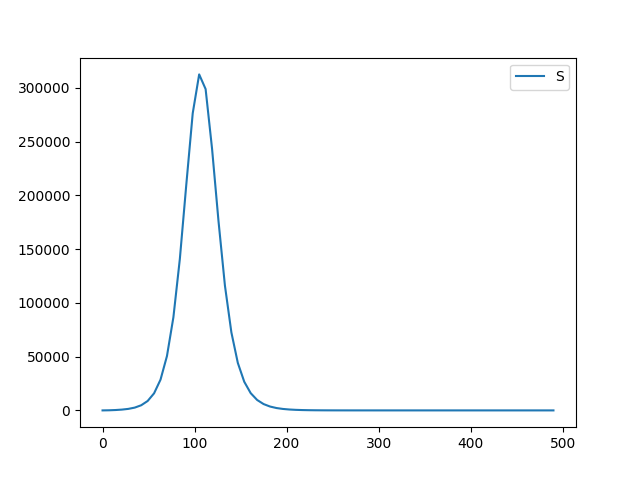

In [2]:
%matplotlib widget
from matplotlib import pyplot as plt
#plot
plt.figure()
res = sol.y[12]#np.sum(sol.y[2:6],axis=0) + sol.y[7]
plt.plot(sol.t, res)
plt.legend(["S", "E", "A", "I", "Q", "H", "V", "R", "D"])
plt.show()


In [18]:
def obj(params):
    #frequentist parameter estimation
#     mod_params = init_params
#     mod_params[0] = params[0]
#     mod_params[7] = params[1]
#     e0 =  params[0]
#     a0 = params[1]
#     s0 = N - (e0 + a0 + I0 + Q0 + H0 + V0 + R0 + D0)
#     y0 = np.array([s0, e0, a0, I0, Q0, H0, V0, R0, D0])
#     p = params[2:]
#     p = init_params
#     p[0] = params[0]
#     p[1] = params[1]
#     p[2] = params[2]
#     p[3] = params[3]
#     p[4] = params[4]
#     p[5] = params[5]
#     p[6] = params[6]
#     p[7] = params[7]
#     p[8] = params[8]
#     p[9] = params[9]
#     p[10] = params[10]
#     p[11] = params[11]
#     p[12] = params[12]
#     p[13] = params[13]
#     p[14] = params[14]
#     p[15] = params[15]
#     p[16] = params[16]
#     p[17] = params[17]
#     p[18] = params[18]
    sir_func = lambda t, y: sir9_rhs(t,y,params)
    sol = solve_ivp(sir_func, t_span, y0, t_eval=t_eval)
    res = sol.y[4]+sol.y[12]#np.sum(sol.y[2:6],axis=0)+sol.y[7]
#     if len(res) < 71:
#         print(res, sol)
    return cases - res

from scipy.optimize import least_squares
num_params = len(init_params)
inits = np.random.rand(num_params)
inits[15] += 1
# inits = np.array([1.39739764e+00, 9.17675679e-01, 6.04061416e-02, 6.41417426e-01,\
#        1.01311058e-01, 1.64939831e|-02, 5.76714824e-01, 1.40471895e+00,\
#        2.47948595e-04, 7.11253849e-04, 4.65670237e-01, 1.64271527e-01,\
#        1.97991714e-01, 2.46167583e-01, 1.24318624e+00, 1.31824150e+00,\
#        8.66187510e-02, 1.14073737e-01, 4.29716982e-01])
# inits[1] += 1#np.array([8.93569359e-01, 4.95348727e-01, 4.73774257e-19, 5.29887968e-01,\
#        7.48640151e-02, 1.94709299e-02, 1.15875881e-01, 9.83096399e-01,\
#        2.36108066e-03, 2.85829932e-06, 5.06632136e-04, 3.35505239e-01,\
#        7.83574030e-01])#np.random.rand(13)
# inits[0] = E0
# inits[1] = A0
# inits[2:] = init_params
bnds = [[0,]*num_params,[np.inf,]*num_params]
# bnds[1][15] = 2
bnds[0][15] = 1
bnds[1][13] = 1
bnds[1][14] = 1
bnds[1][16] = 1
bnds[1][17] = 1
bnds[1][18] = 1
bnds[1][19] = 1

# bnds[0][1] = 1
res = least_squares(obj, inits,bounds=bnds,verbose=2)
# final_params = init_params
# final_params[0] = res.x[0]
# final_params[7] = res.x[1]
# p = init_params
# p[0] = res.x[0]
# p[1] = res.x[1]
# p[2] = res.x[2]
# p[3] = res.x[3]
# p[4] = res.x[4]
# p[5] = res.x[5]
# p[6] = res.x[6]
# p[7] = res.x[7]
# p[8] = res.x[8]
# p[9] = res.x[9]
# p[10] = res.x[10]
# p[11] = res.x[11]
# p[12] = res.x[12]
# p[13] = res.x[13]
# p[14] = res.x[14]
# p[15] = res.x[15]
# p[16] = res.x[16]
# p[17] = res.x[17]
# p[18] = res.x[18]
sir_func = lambda t, y: sir9_rhs(t,y,res.x)
# e0 =  res.x[0]
# a0 = res.x[1]
# s0 = N - (e0 + a0 + I0 + Q0 + H0 + V0 + R0 + D0)
# y0 = np.array([s0, e0, a0, I0, Q0, H0, V0, R0, D0])
sol = solve_ivp(sir_func, t_span, y0, t_eval=t_eval)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.6846e+11                                    2.74e+05    
       1              4         6.6846e+11      1.39e+06       2.65e-01       8.81e+06    
       2              6         6.6843e+11      2.73e+07       1.12e-01       3.18e+08    
       3              7         6.6704e+11      1.39e+09       2.38e-01       5.29e+10    
       4              9         6.6534e+11      1.70e+09       6.08e-02       8.00e+10    
       5             10         6.6479e+11      5.56e+08       1.24e-01       1.27e+11    
       6             11         6.6060e+11      4.18e+09       3.08e-02       1.06e+11    
       7             12         6.5744e+11      3.16e+09       5.78e-02       2.27e+10    
       8             13         6.5341e+11      4.03e+09       5.57e-02       1.24e+11    
       9             16         6.5295e+11      4.57e+08       7.11e-03       2.88e+10    

In [20]:
res.x

array([1.19296862e+00, 7.84851094e-01, 3.57770794e-01, 9.95958637e-01,
       3.56890040e-01, 1.99145277e-02, 3.95161601e-01, 1.34137324e+00,
       2.66377193e-04, 3.38061005e-02, 5.31837186e-02, 2.31692411e-01,
       9.58699934e-01, 3.78640211e-01, 8.97313593e-01, 1.00031774e+00,
       3.57135250e-01, 4.68072714e-01, 3.15583741e-01, 1.98825102e-01])

In [6]:
q_opt = res.x

In [45]:
# array([1.00475950e+00, 1.44986701e+00, 5.01951513e-01, 6.96239875e-01,
#        2.68937928e-03, 8.27382287e-03, 5.51680113e-01, 1.18212865e+00,
#        1.54029144e-02, 4.93600674e-05, 3.56600205e-01, 3.04540428e-01,
#        7.07418037e-01, 9.26993095e-01, 4.41076656e-01, 1.04845397e+00,
#        1.66284985e-01, 3.79892987e-02, 7.33896074e-01])
# array([1.39739764e+00, 9.17675679e-01, 6.04061416e-02, 6.41417426e-01,
#        1.01311058e-01, 1.64939831e-02, 5.76714824e-01, 1.40471895e+00,
#        2.47948595e-04, 7.11253849e-04, 4.65670237e-01, 1.64271527e-01,
#        1.97991714e-01, 2.46167583e-01, 1.24318624e+00, 1.31824150e+00,
#        8.66187510e-02, 1.14073737e-01, 4.29716982e-01])


# array([1.78908138e-01, 1.10506388e-01, 1.40454306e-01, 1.49603452e+00,
#        2.33018801e+00, 9.60558299e-37, 2.58214985e-01, 1.23130146e+00,
#        7.80906097e-06, 3.20052356e-37, 8.31772821e-33, 5.91035028e-01,
#        2.39404513e-01, 9.99930873e-01, 9.58668282e-01, 1.33129434e+00,
#        8.30634851e-02, 7.68198760e-02, 5.52660461e-01, 1.98630298e-01])


array([0.58278116, 0.25827399, 0.52570305, 0.63901238, 0.94442765,
       0.90093187, 0.13032268, 0.90949059, 0.93024721, 0.10891039,
       0.6595182 , 0.72444687, 0.74785369, 0.61349626, 0.49618079,
       1.62640636, 0.79975426, 0.89339675, 0.19349657])

In [21]:
q_opt

array([0.88162196, 0.89590647, 0.20739988, 0.95425036, 0.24865031,
       0.01917138, 0.19068274, 1.89308963, 0.31841222, 0.00768999,
       0.08056135, 0.45934905, 0.86706427, 0.68209073, 0.77404936,
       1.00047632, 0.72025358, 0.45772992, 0.73662872, 0.21636691])

In [7]:
q_opt = np.array([1.78908138e-01, 1.10506388e-01, 1.40454306e-01, 1.49603452e+00,\
       2.33018801e+00, 9.60558299e-37, 2.58214985e-01, 1.23130146e+00,\
       7.80906097e-06, 3.20052356e-37, 8.31772821e-33, 5.91035028e-01,\
       2.39404513e-01, 9.99930873e-01, 9.58668282e-01, 1.33129434e+00,\
       8.30634851e-02, 7.68198760e-02, 5.52660461e-01, 1.98630298e-01])
#res.x

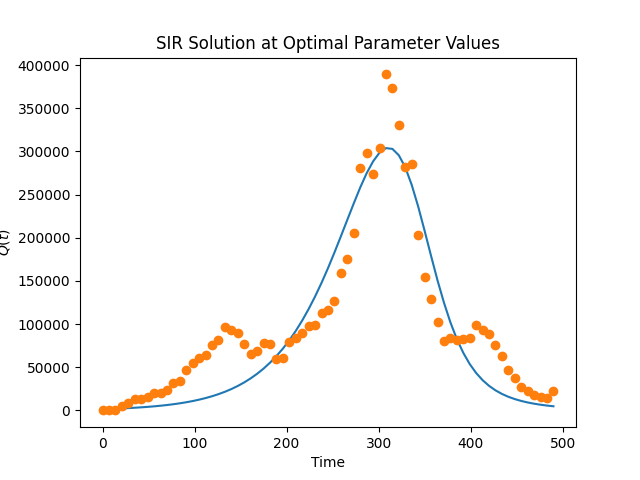

In [19]:
%matplotlib widget
from matplotlib import pyplot as plt

plt.figure()
# res = sol.y[4]#np.sum(sol.y[2:6],axis=0) + sol.y[7]

plt.plot(sol.t, sol.y[4]+sol.y[12],label='model')
# plt.legend(["S", "E", "A", "I", "Q", "H", "V", "R", "D"])
# plt.show()
# plt.figure()
plt.xlabel('Time')
plt.ylabel('$Q(t)$')
plt.title('SIR Solution at Optimal Parameter Values')

plt.plot(sol.t, cases, 'o',label='data')
plt.savefig('opt_sol_2.png')
plt.show()

In [12]:
#sensitivity
#frequentist estimation
# init_p = np.array([
#     0.5, .9, 0.002, 0.167, 0.3, 0.1, 1e-5, 0.25, 0.10, 0.10, 0.22, 0.09,
#     0.06
# ])
opt_p = q_opt

# np.array([1.78908138e-01, 1.10506388e-01, 1.40454306e-01, 1.49603452e+00,\
#        2.33018801e+00, 9.60558299e-37, 2.58214985e-01, 1.23130146e+00,\
#        7.80906097e-06, 3.20052356e-37, 8.31772821e-33, 5.91035028e-01,\
#        2.39404513e-01, 9.99930873e-01, 9.58668282e-01, 1.33129434e+00,\
#        8.30634851e-02, 7.68198760e-02, 5.52660461e-01, 1.98630298e-01])

# np.array([1.39739764e+00, 9.17675679e-01, 6.04061416e-02, 6.41417426e-01,\
#        1.01311058e-01, 1.64939831e-02, 5.76714824e-01, 1.40471895e+00,\
#        2.47948595e-04, 7.11253849e-04, 4.65670237e-01, 1.64271527e-01,\
#        1.97991714e-01, 2.46167583e-01, 1.24318624e+00, 1.31824150e+00,\
#        8.66187510e-02, 1.14073737e-01, 4.29716982e-01])

# np.array([8.57830675e-01, 4.47173083e-01, 3.15724895e-32, 7.09419590e-01,\
#        8.01151835e-02, 1.97759621e-02, 1.16078318e-01, 9.98717740e-01,\
#        2.71493742e-05, 3.30629274e-11, 8.74861983e-05, 5.63212069e-01,\
#        8.13896292e-01])
#finite difference sensitivity
h = 1e-6

sens_mat = np.zeros((len(opt_p), len(sol.t)))
for i in range(len(opt_p)):
    e_i = np.eye(len(opt_p))[i]
    sir1 = lambda t, y: sir9_rhs(t, y, opt_p)
    sir2 = lambda t, y: sir9_rhs(t, y, opt_p+h*e_i)
    sol1 = solve_ivp(sir1, t_span, y0, t_eval=t_eval)
    sol2 = solve_ivp(sir2, t_span, y0, t_eval=t_eval)
    sens_mat[i] = (sol2.y[4]-sol1.y[4])/h


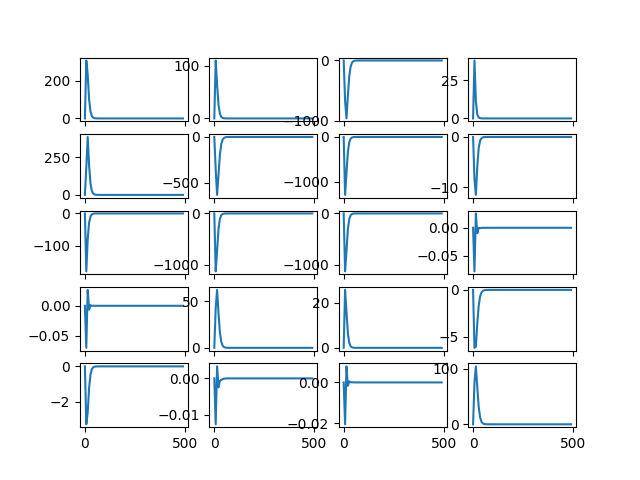

In [13]:
plt.close('all')
fig, ax = plt.subplots(5,4,sharex=True)
for i in range(20):
    ax[int(i/4),int(i%4)].plot(sol.t, sens_mat[i])
# plt.figure()
# plt.plot(sol.t, sens_mat[-1]/N)
plt.show()

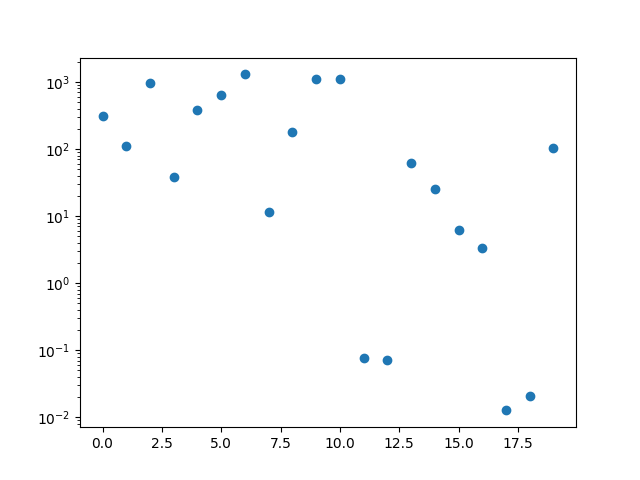

In [14]:
sens_max = np.array([np.max(np.abs(row)) for row in sens_mat])
plt.figure()
plt.semilogy(sens_max, 'o')
plt.show()

In [15]:
opt_res = obj(q_opt)
sig2 = 1/(len(sol.t)-len(q_opt))*(opt_res.dot(opt_res))
V = sig2*np.linalg.pinv(sens_mat@sens_mat.T)


In [16]:
from pymcmcstat.MCMC import MCMC
from pymcmcstat.ParallelMCMC import ParallelMCMC
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import mcmcplot.mcmatplot as mcmpl
import mcmcplot.mcseaborn as mcsbn
import scipy.io as sio


In [24]:
#MCMC
mcstat = MCMC()
# beta,
#         c,
#         theta,
#         alpha,
#         epsilon,
#         gamma1,
#         mu,
#         kappa,
#         gamma2,
#         gamma3,
#         rho,
#         gamma4,
#         muH,
#add dataset
mcstat.data.add_data_set(
  x = sol.t,
  y = cases   
)

#add parameters
mcstat.parameters.add_model_parameter(
    name = '$\\beta$',
    theta0 = q_opt[0],
    minimum = 0,
#     maximum = 1,
)

mcstat.parameters.add_model_parameter(
    name = '$c$',
    theta0 = q_opt[1],
    minimum = 0,
#     maximum = 1,
)

mcstat.parameters.add_model_parameter(
    name = '$\\theta$',
    theta0 = q_opt[2],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\\alpha$',
    theta0 = q_opt[3],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\epsilon$',
    theta0 = q_opt[4],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\gamma_1$',
    theta0 = q_opt[5],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\mu$',
    theta0 = q_opt[6],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\kappa$',
    theta0 = q_opt[7],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\gamma_2$',
    theta0 = q_opt[8],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\gamma_3$',
    theta0 = q_opt[9],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\\rho$',
    theta0 = q_opt[10],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\gamma_4$',
    theta0 = q_opt[11],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\mu_H$',
    theta0 = q_opt[12],
    minimum = 0,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\\beta_v$',
    theta0 = q_opt[13],
    minimum = 0,
    maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\\alpha_v$',
    theta0 = q_opt[14],
    minimum = 0,
    maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\gamma_v$',
    theta0 = q_opt[15],
    minimum = 1,
#     maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\mu_v$',
    theta0 = q_opt[16],
    minimum = 0,
    maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\\rho_v$',
    theta0 = q_opt[17],
    minimum = 0,
    maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\mu_{H_v}$',
    theta0 = q_opt[18],
    minimum = 0,
    maximum = 1,
)
mcstat.parameters.add_model_parameter(
    name = '$\epsilon_v$',
    theta0 = q_opt[19],
    minimum = 0,
    maximum = 1,
)

# #simulation options

savedir = "100kchain_new2"

mcstat.simulation_options.define_simulation_options(
    nsimu=int(1e5),
    updatesigma=True,
    method='dram',
    verbosity=1,
    savedir=savedir,
    savesize=1000,
    waitbar=1,
    save_to_json=True,
    save_to_bin=True,
    save_to_txt=True
)


# #model settings
def ssfun(p, data):
    res = obj(p)
    return res.dot(res)

mcstat.model_settings.define_model_settings(
    sos_function=ssfun,
    N0 = 1,
    N = len(sol.t),
)

In [25]:
# parallel_mcstat = ParallelMCMC()
# parallel_mcstat.setup_parallel_simulation(mcstat,num_cores=10)
# parallel_mcstat.run_parallel_simulation()
mcstat.run_simulation()
results = mcstat.simulation_results.results
# specify burnin period
burnin = int(results['nsimu']/10)
# display chain statistics
chain = np.array(results['chain'])
s2chain = np.array(results['s2chain'])
sschain = np.array(results['sschain'])
names = np.array(results['names'])
mcstat.chainstats(chain[burnin:,:], results)
print('Acceptance rate: {:6.4}%'.format(100*(1 - results['total_rejected'])))
print('Model Evaluations: {}'.format(results['nsimu'] - results['iacce'][0] + results['nsimu']))
print('Observation Variance: {}'.format(s2chain[-1]))
print('Intial Covariance: {}'.format(results['qcov']))
print('Final Covariance: {}'.format(results['cov']))


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
   $\beta$:      0.88 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
       $c$:      0.90 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
  $\theta$:      0.21 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
  $\alpha$:      0.95 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
$\epsilon$:      0.25 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
$\gamma_1$:      0.02 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
     $\mu$:      0.19 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
  $\kappa$:      1.89 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
$\gamma_2$:      0.32 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
$\gamma_3$:  7.69e-03 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
    $\rho$:      0.08 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
$\gamma_4$:      0.46 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
   $\mu_H$:      0.87 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
 $\beta_v$:      0.

In [30]:
import pymcmcstat
pymcmcstat.chain.ChainStatistics.chainstats(chain[burnin:,:], results)



------------------------------
      name:      mean       std    MC_err       tau    geweke
   $\beta$:      0.20      0.01  1.27e-03   1041.38      1.00
       $c$:      0.08      0.05  7.40e-03   3372.24      0.53
  $\theta$:      0.23      0.11      0.02   9229.67      0.45
  $\alpha$:      7.47      7.75      1.56   8286.84      0.04
$\epsilon$:      2.50      0.60      0.10   4094.26      0.80
$\gamma_1$:  6.79e-04  6.29e-04  6.31e-05   1061.09      0.63
     $\mu$:      0.36      0.16      0.03   1755.78      0.63
  $\kappa$:      2.96      2.15      0.42   9538.53      0.11
$\gamma_2$:      0.01      0.01  2.94e-03   7412.30      0.04
$\gamma_3$:  1.09e-03  9.40e-04  1.38e-04   3157.47      0.10
    $\rho$:      0.01      0.01  2.72e-03   5170.78      0.06
$\gamma_4$:      0.30      0.30      0.04   2593.79      0.45
   $\mu_H$:      0.31      0.18      0.03   1854.51      0.49
 $\beta_v$:      0.91      0.07  5.99e-03    847.97      0.99
$\alpha_v$:      0.53      0.27      

In [35]:
import pickle
with open('sir_100k_new_results.pkl', 'wb') as outp:
    pickle.dump(results, outp, pickle.HIGHEST_PROTOCOL)

In [26]:
np.save('100k_chain_new2',chain)
np.save('100k_s2chain_new2',s2chain)
np.save('100k_sschain_new2',sschain)
np.save('100k_names_new2',names)

In [11]:
import pymcmcstat
results = pymcmcstat.structures.ResultsStructure.ResultsStructure.load_json_object("100kchain.json")

c:\users\19198\appdata\local\programs\python\python39\lib\site-packages\mcmcplot\mcmatplot.py:317: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=1.0)  # adjust spacing
C:\Users\19198\AppData\Local\Temp/ipykernel_15788/4027360779.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


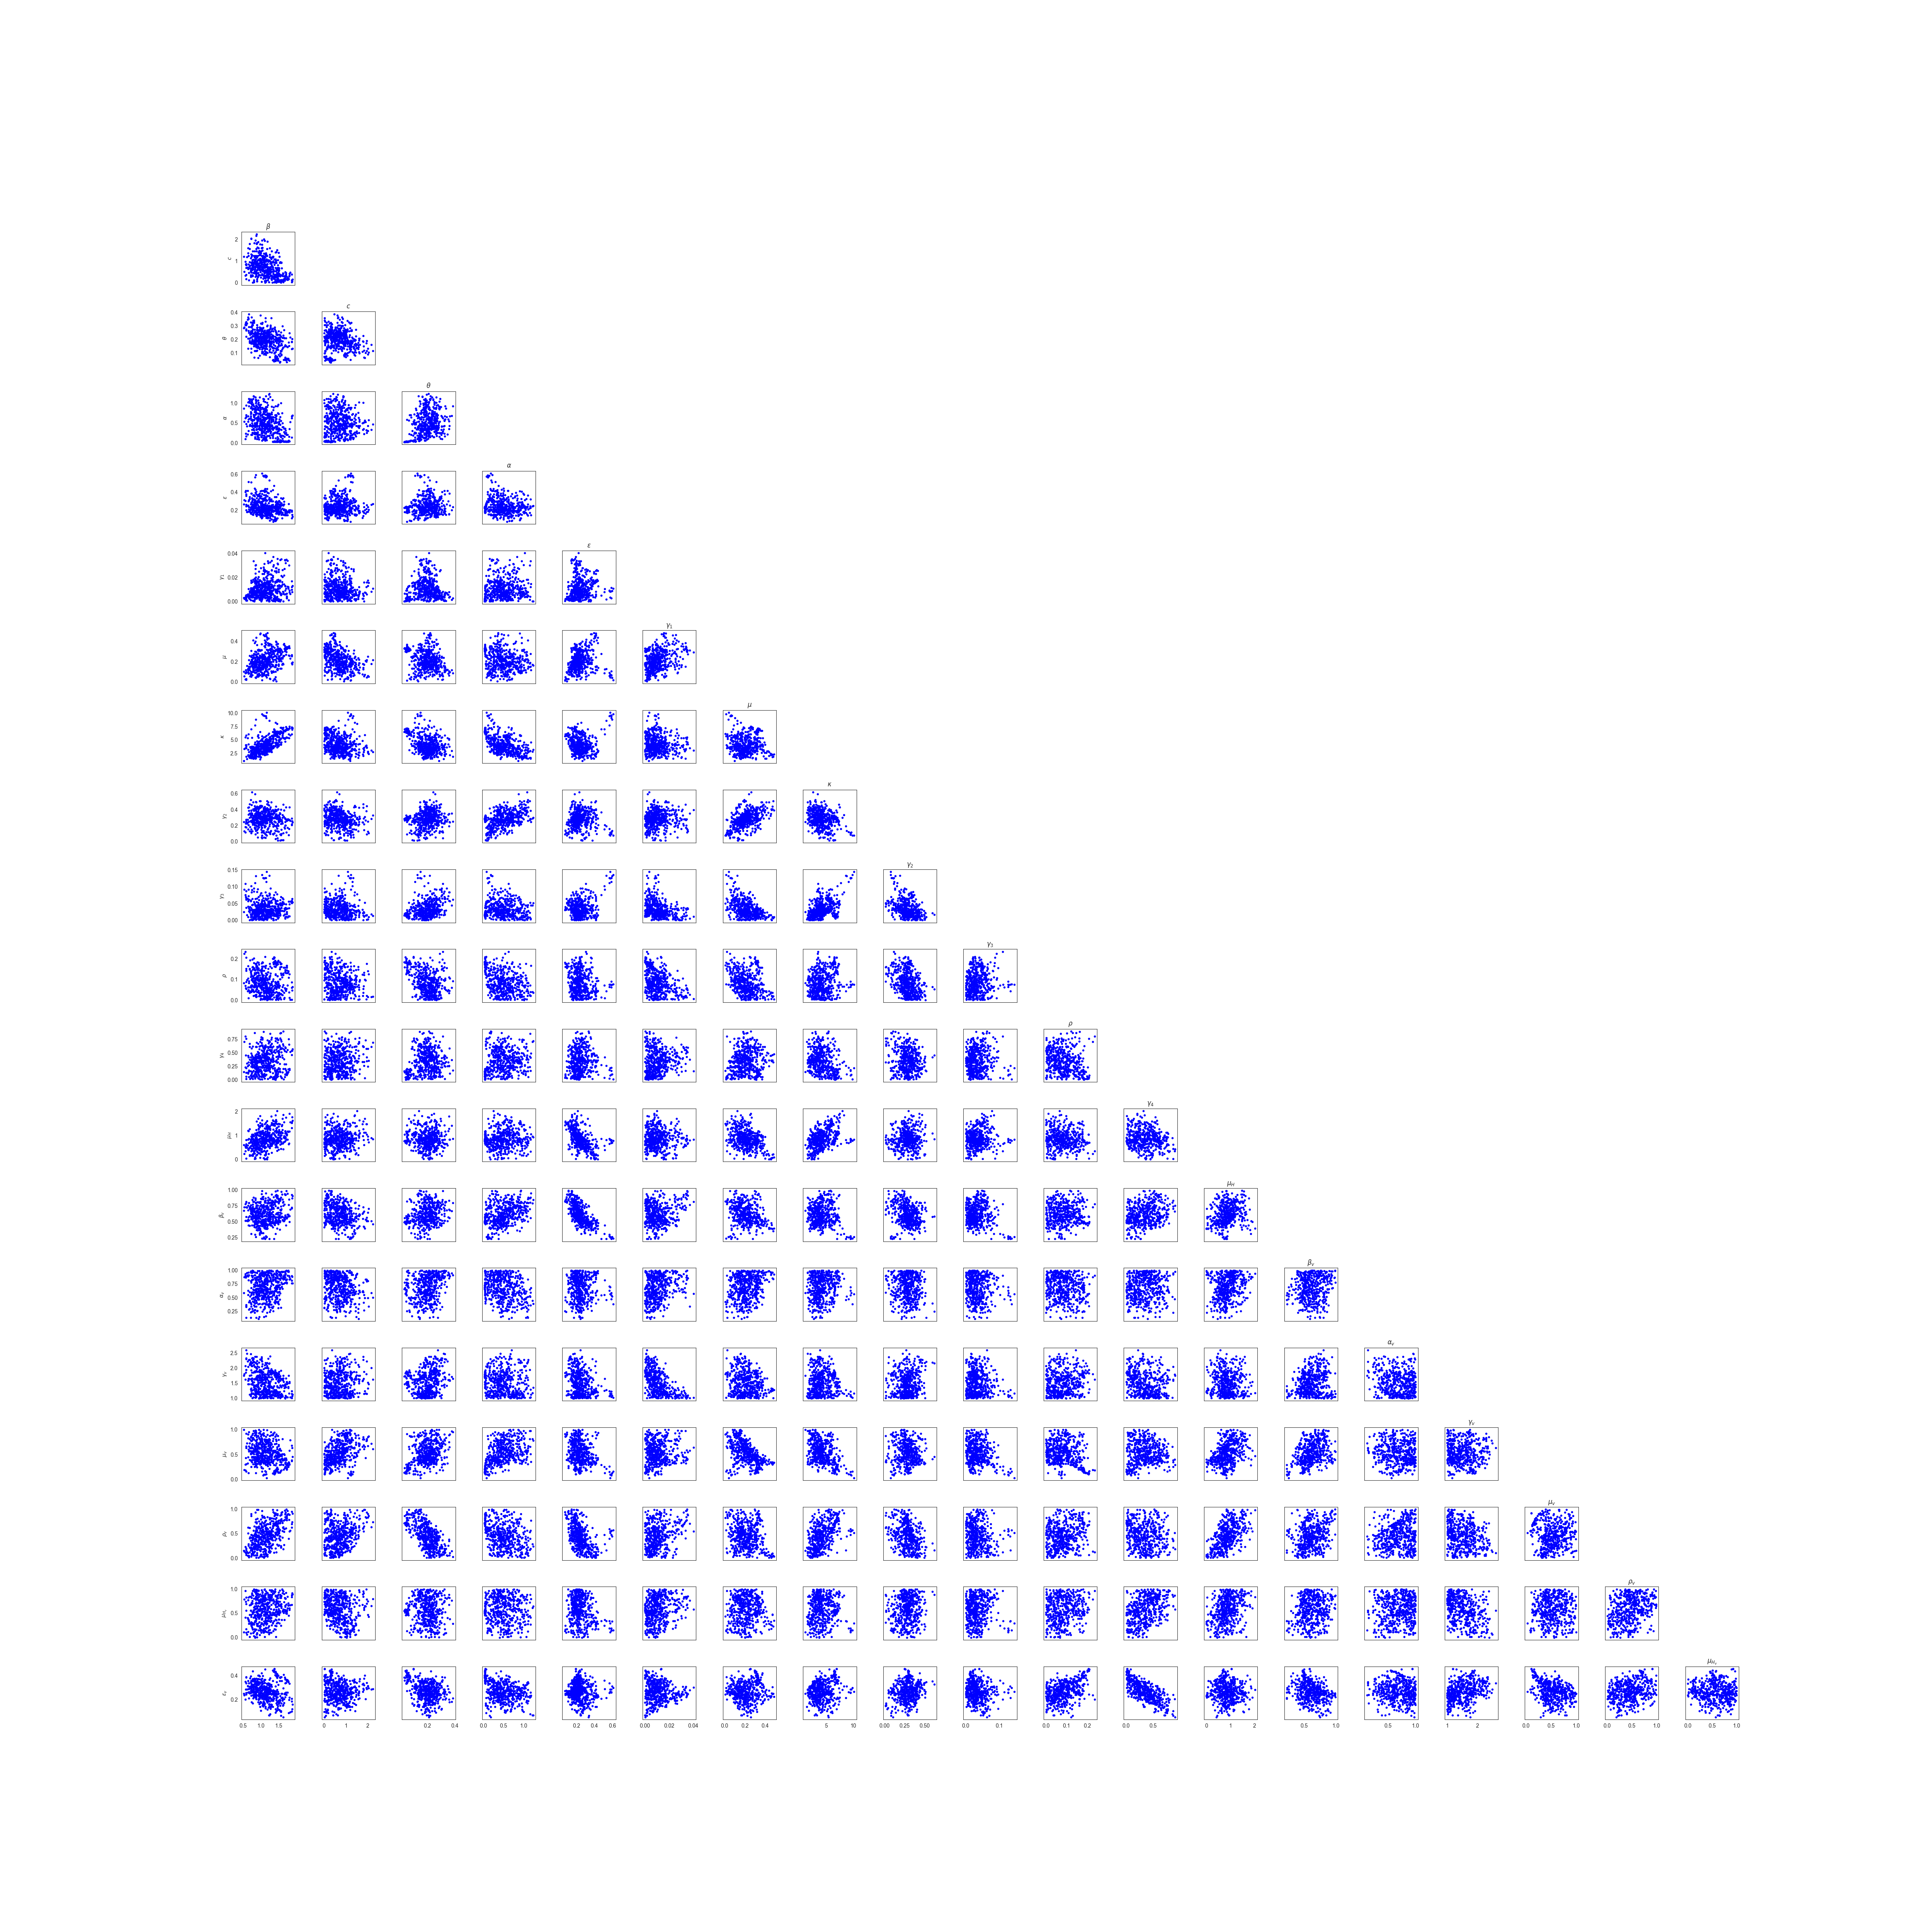

In [30]:
import mcmcplot.mcmatplot as mcmpl
plt.close("all")
num_param = 20
sns.set_style('white')
mcmpl.plot_density_panel(chain[burnin:,:num_param], names[:num_param]) # last argument turns hist on/off
# mcmpl.plot_chain_panel(chain[burnin:,:num_param], names[:num_param])
# mcmpl.plot_pairwise_correlation_panel(chain[burnin:,:num_param], names[:num_param])
plt.tight_layout()
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.gcf().set_size_inches(50,50)
plt.savefig("density2.png", dpi=600)

In [31]:
import pymcmcstat.settings.DataStructure as DS

def predmodelfun(data, p):
    sir = lambda t,y: sir9_rhs(t,y,p)
    sol = solve_ivp(sir, t_span, y0, t_eval=t_eval)
    return sol.y[4] + sol.y[12]
preddata = DS.DataStructure()
preddata.add_data_set(
  x = sol.t,
  y = cases
)

mcstat.PI.setup_prediction_interval_calculation(results = results, data = preddata, modelfunction = predmodelfun)
mcstat.PI.generate_prediction_intervals(nsample = 500, calc_pred_int = 'on', waitbar = True)



Generating credible/prediction intervals:

 [-----------------100%-----------------] 500 of 500 complete in 70.6 sec
Interval generation complete



In [39]:
dir(mcstat)

['PI',
 '_MCMC__chain',
 '_MCMC__chain_index',
 '_MCMC__chains',
 '_MCMC__execute_simulator',
 '_MCMC__expand_chains',
 '_MCMC__generate_simulation_results',
 '_MCMC__initial_set',
 '_MCMC__initialize_chains',
 '_MCMC__old_set',
 '_MCMC__prior_object',
 '_MCMC__rejected',
 '_MCMC__s2chain',
 '_MCMC__save_chains',
 '_MCMC__save_covmtx_chain',
 '_MCMC__save_to_log_file',
 '_MCMC__setup_simulator',
 '_MCMC__simulation_time',
 '_MCMC__sos_object',
 '_MCMC__sschain',
 '_MCMC__update_chain',
 '_MCMC__update_rejected',
 '_MCMC__wbarstatus',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_covariance',
 '_error_variance',
 '_initialize_simulation',
 '_mcmc_s

In [69]:
mcstat.PI.plot_prediction_intervals(adddata=True)
plt.savefig("sus.png")

c:\users\s7690\appdata\local\programs\python\python38\lib\site-packages\pymcmcstat\plotting\PredictionIntervals.py:716: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(ny, 1, jj+1)
c:\users\s7690\appdata\local\programs\python\python38\lib\site-packages\pymcmcstat\plotting\PredictionIntervals.py:717: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [114]:
import pickle
with open('sir_100k_new_intervals.pkl', 'wb') as outp:
    pickle.dump(mcstat.PI.intervals, outp, pickle.HIGHEST_PROTOCOL)

In [120]:
pi_int = mcstat.PI.intervals['prediction_intervals'][0][0]
np.save('pi_int',pi_int)
ci_int = mcstat.PI.intervals['credible_intervals'][0][0]
np.save('pi_int',ci_int)

(3, 71)

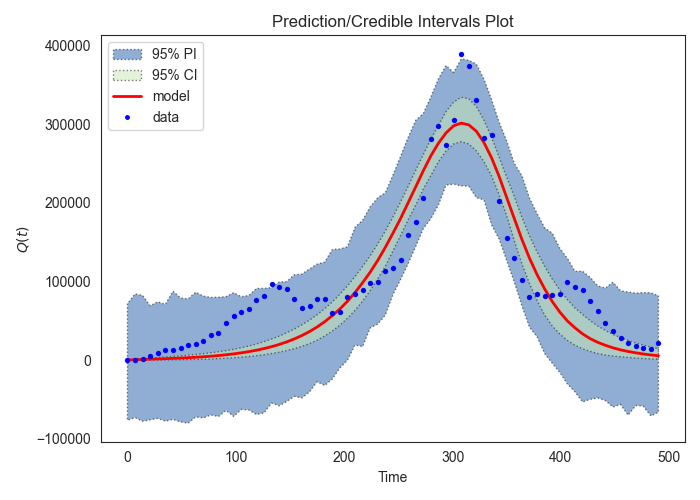

In [33]:
plt.close('all')
fig1, ax1 = mcstat.PI.plot_prediction_intervals(adddata=True, addlegend=True, plot_pred_int=True)
for ii in range(len(preddata.xdata)):
    ax1[ii].plot(preddata.xdata[ii], preddata.ydata[ii], 'bo',
                      markersize = 3,
                      alpha=0.5,
                      label = 'data')
ax1[ii].set_ylabel('$Q(t)$')
ax1[ii].set_xlabel('Time')
ax1[ii].set_title('Prediction/Credible Intervals Plot')
plt.tight_layout()
#     ax1[ii].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("PICI2.png",dpi=600)


In [27]:
import dill
dill.dump_session('sir_notebook_env.db')

NotImplementedError: object proxy must define __reduce_ex__()